# WEEK5 HW: UNSUPERVISED LEARNING

In [1]:
import sklearn
import numpy as np
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)
import matplotlib.pyplot as plt
np.random.seed(42)

## Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

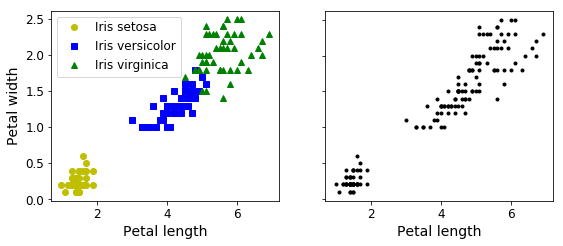

In [4]:
plt.figure(figsize = (9, 3.5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[y == 0, 3], "yo", label = "Iris setosa")
plt.plot(X[y == 1, 2], X[y == 1, 3], "bs", label = "Iris versicolor")
plt.plot(X[y == 2, 2], X[y == 2, 3], "g^", label = "Iris virginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], color = "k", marker = ".")
plt.xlabel("Petal length", fontsize = 14)
plt.tick_params(labelleft = False)

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

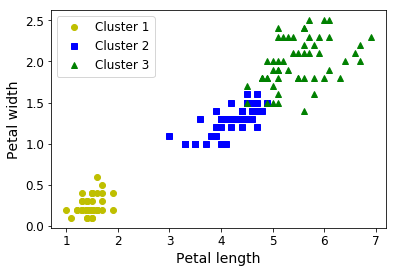

In [8]:
plt.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label = "Cluster 1")
plt.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bs", label = "Cluster 2")
plt.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "g^", label = "Cluster 3")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 12)

In [9]:
np.sum(y_pred == y), np.sum(y_pred == y) / len(y_pred)

(145, 0.9666666666666667)

## K-Means

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array([[0.2, 2.3],
                        [-1.5, 2.3],
                        [-2.8, 1.8],
                        [-2.8, 2.8],
                        [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                  cluster_std = blob_std, random_state = 7)

Text(0, 0.5, '$x_2$')

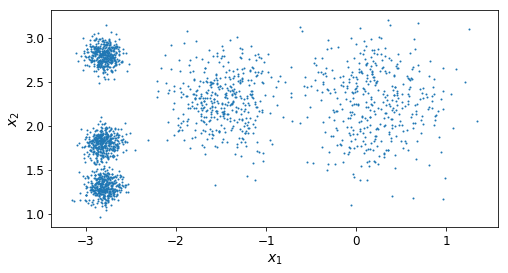

In [13]:
plt.figure(figsize = (8, 4))
plt.scatter(X[:, 0], X[:, 1], s = 1)
plt.xlabel("$x_1$", fontsize = 14)
plt.ylabel("$x_2$", fontsize = 14)

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_pred = kmeans.fit_predict(X)
y_pred is kmeans.labels_

True

In [16]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [17]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [18]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize = 2)

def plot_centroids(centroids, weights = None, circle_color = 'w', cross_color = 'k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s = 30,
                linewidths = 8, color = circle_color, zorder = 10, alpha = 0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker = 'x', s = 50, linewidths = 50,
                color = cross_color, zorder = 11, alpha = 1)

def plot_decision_boundaries(clusterer, X, resolution = 1000, show_centroids = True,
                             show_xlabels = True, show_ylabels = True):
    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]), cmap = "Pastel2")
    plt.contour(Z, extent = (mins[0], maxs[0], mins[1], maxs[1]), linewidths = 1,
                colors = 'k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize = 14)
    else:
        plt.tick_params(labelbottom = False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize = 14, rotation = 0)
    else:
        plt.tick_params(labelleft = False)

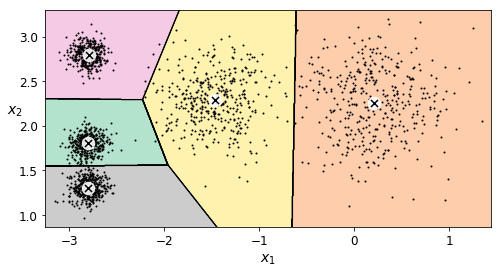

In [19]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans, X)

## Hard Clustering vs Soft Clustering

In [20]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [21]:
np.linalg.norm(np.tile(X_new, (1, 5)).reshape(-1, 5, 2) - kmeans.cluster_centers_, axis = 2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

## K-Means Algorithm

In [22]:
kmeans_iter1 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                      algorithm = "full", max_iter = 1, random_state = 1)
kmeans_iter2 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                      algorithm = "full", max_iter = 2, random_state = 1)
kmeans_iter3 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                      algorithm = "full", max_iter = 3, random_state = 1)
kmeans_iter1.fit(X), kmeans_iter2.fit(X), kmeans_iter3.fit(X)

(KMeans(algorithm='full', copy_x=True, init='random', max_iter=1, n_clusters=5,
     n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
     tol=0.0001, verbose=0),
 KMeans(algorithm='full', copy_x=True, init='random', max_iter=2, n_clusters=5,
     n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
     tol=0.0001, verbose=0),
 KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
     n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
     tol=0.0001, verbose=0))

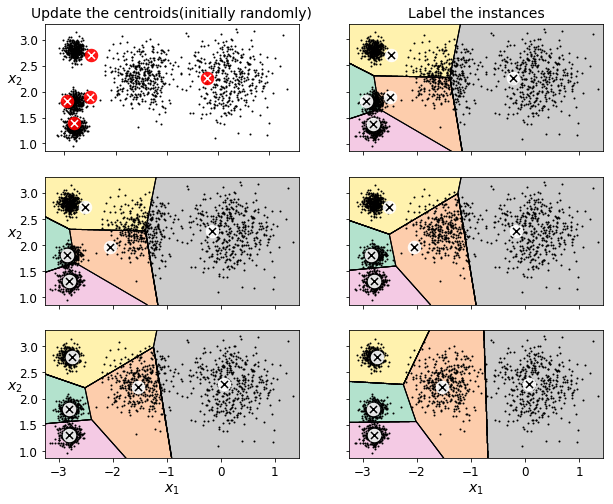

In [23]:
plt.figure(figsize = (10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color = 'r', cross_color = 'w')
plt.ylabel("$x_2$", fontsize = 14, rotation = 0)
plt.tick_params(labelbottom = False)
plt.title("Update the centroids(initially randomly)", fontsize = 14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels = False, show_ylabels = False)
plt.title("Label the instances", fontsize = 14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids = False, show_xlabels = False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels = False, show_ylabels = False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids = False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels = False)

## K-Means Variability

In [24]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1, title2):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize = (10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels = False)
    plt.title(title2, fontsize=14)

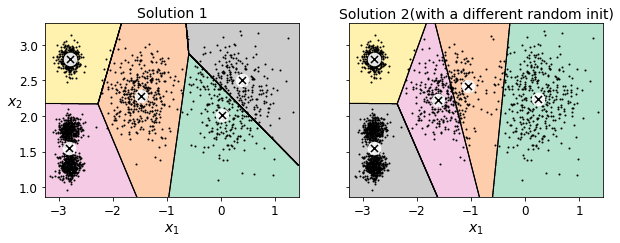

In [25]:
kmeans_rnd_init1 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                          algorithm = "full", random_state = 11)
kmeans_rnd_init2 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                          algorithm = "full", random_state = 19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1",
                          "Solution 2(with a different random init)")

## Inertia

In [26]:
kmeans.inertia_

211.5985372581684

In [27]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2)

211.59853725816856

In [28]:
kmeans.score(X)

-211.59853725816856

## Multiple Initializations

In [29]:
kmeans_rnd_init1.inertia_, kmeans_rnd_init2.inertia_

(223.29108572819035, 237.46249169442845)

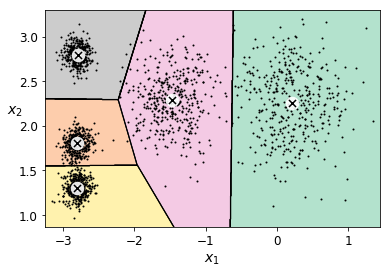

In [30]:
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init = "random", n_init = 10,
                             algorithm = "full", random_state = 11)
kmeans_rnd_10_inits.fit(X)

plot_decision_boundaries(kmeans_rnd_10_inits, X)

## K-Means++

In [31]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

## Accelerated K-Means

In [33]:
%timeit -n 50 KMeans(algorithm = "elkan").fit(X)

79.2 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [34]:
%timeit -n 50 KMeans(algorithm = "full").fit(X)

87.2 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Mini-Batch K-Means

In [35]:
from sklearn.cluster import MiniBatchKMeans

In [36]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [37]:
minibatch_kmeans.inertia_

211.93186531476775

In [38]:
import urllib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [39]:
mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.int64)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state = 42)

In [41]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [42]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 10, batch_size = 10, random_state = 42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [43]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace = False)]

In [44]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500 #++에서는 init size 더 크게 잡아야 함
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters = k, init_size = init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [45]:
best_kmeans.score(X)

-211.74678991243132

In [46]:
%timeit KMeans(n_clusters=5).fit(X)

41.4 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

21.6 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
from timeit import timeit

In [49]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters = k, random_state = 42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters = k, random_state = 42)
    print("\r{}/{}".format(k, 100), end = "")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number = 10, globals = globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number = 10, globals = globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

[1, 100, 0, 6]

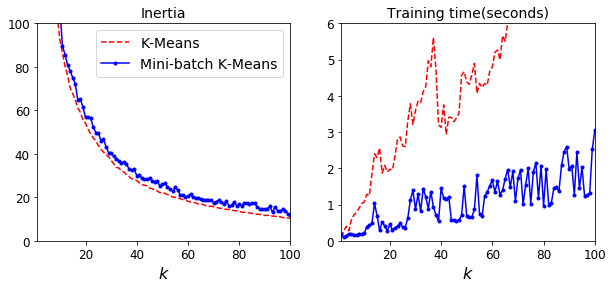

In [50]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label = "K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label = "Mini-batch K-Means")
plt.xlabel("$k$", fontsize = 16)
plt.title("Inertia", fontsize = 14)
plt.legend(fontsize = 14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label = "K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label = "Mini-batch K-Means")
plt.xlabel("$k$", fontsize = 16)
plt.title("Training time(seconds)", fontsize = 14)
plt.axis([1, 100, 0, 6])

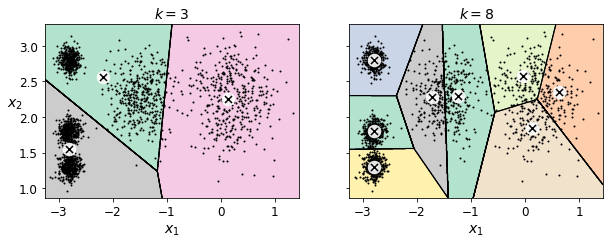

In [51]:
kmeans_k3 = KMeans(n_clusters = 3, random_state = 42)
kmeans_k8 = KMeans(n_clusters = 8, random_state = 42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

## Optimal number of clusters 찾기 - 1

In [52]:
kmeans_k3.inertia_, kmeans_k8.inertia_

(653.2167190021553, 119.11983416102879)

In [53]:
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

[1, 8.5, 0, 1300]

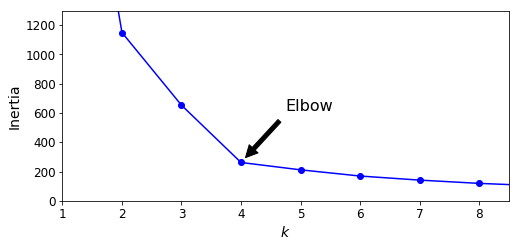

In [54]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.annotate('Elbow', xy=(4, inertias[3]), xytext = (0.55, 0.55), textcoords='figure fraction',
             fontsize = 16, arrowprops = dict(facecolor='black', shrink=0.1))
plt.axis([1, 8.5, 0, 1300])

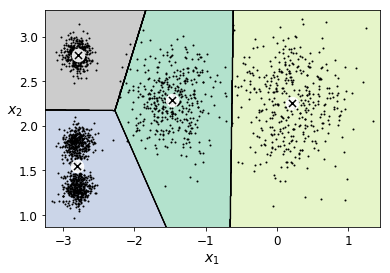

In [55]:
plot_decision_boundaries(kmeans_per_k[4-1], X)

## Optimal number of clusters 찾기 - 2. Silhoutte Score

In [56]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

[1.8, 8.5, 0.55, 0.7]

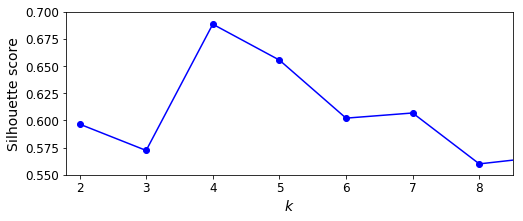

In [58]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize = (8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Silhouette score", fontsize = 14)
plt.axis([1.8, 8.5, 0.55, 0.7])

In [59]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

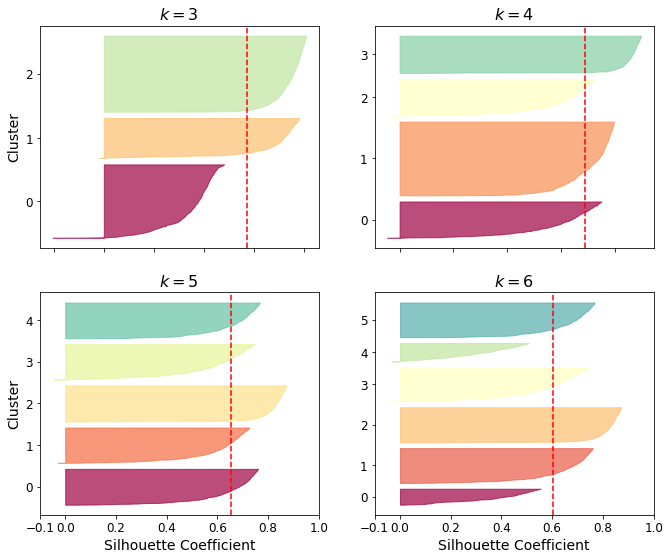

In [60]:
plt.figure(figsize = (11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor = color, edgecolor = color, alpha = 0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom = False)

    plt.axvline(x = silhouette_scores[k - 2], color = "red", linestyle = "--")
    plt.title("$k={}$".format(k), fontsize = 16)

## Limits of K-Means

Text(0, 0.5, '$x_2$')

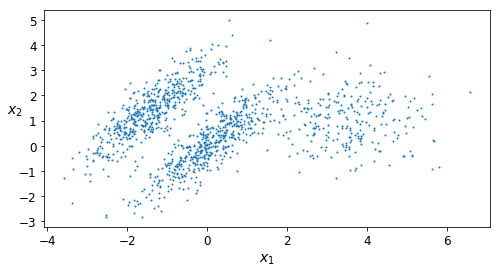

In [61]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.figure(figsize = (8, 4))
plt.scatter(X[:, 0], X[:, 1], s = 1)
plt.xlabel("$x_1$", fontsize = 14)
plt.ylabel("$x_2$", fontsize = 14, rotation = 0)

Text(0.5, 1.0, 'Inertia = 2179.5')

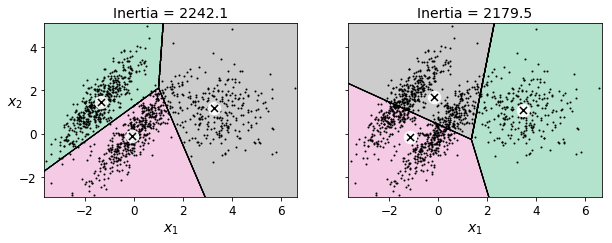

In [62]:
kmeans_good = KMeans(n_clusters = 3, init = np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init = 1, random_state = 42)
kmeans_bad = KMeans(n_clusters = 3, random_state = 42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize = (10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize = 14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels = False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize = 14)

## Clustering for Image Segmentation

In [63]:
import os
PROJECT_ROOT_DIR = "."

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok = True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1d3483d83c8>)

In [64]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [65]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [66]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

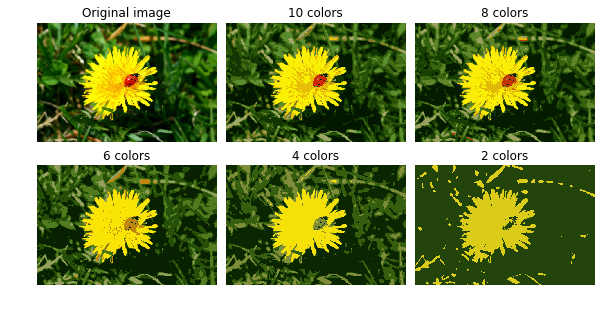

In [67]:
plt.figure(figsize = (10, 5))
plt.subplots_adjust(wspace = 0.05, hspace = 0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

## Clustering for Preprocessing

In [68]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

In [69]:
X_digits, y_digits = load_digits(return_X_y = True)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 42)

In [71]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9688888888888889

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters = 50, random_state = 42)),
                     ("log_reg", LogisticRegression(multi_class = "ovr",
                                                    solver = "lbfgs",
                                                    max_iter = 5000,
                                                    random_state = 42))])
pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test), 1 - (1 - pipeline.score(X_test, y_test)) / (1 - log_reg.score(X_test, y_test))

(0.9777777777777777, 0.28571428571428414)

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

grid_clf.best_params_, grid_clf.score(X_test, y_test)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.1s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=21, total=   3.3s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.4s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   2.7s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   3.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   3.0s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.8s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   2.7s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   2.8s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.9s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   2.9s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   2.9s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.0s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   3.0s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   3.0s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   3.7s
[CV] kmeans__n_clusters=60 ...........................................
[CV] ............................ kmeans__n_clusters=60, total=   5.5s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   6.8s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   5.5s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   4.0s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   3.8s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   4.3s
[CV] kmeans__n_clusters=62 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=79, total=   2.9s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.3s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.1s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   3.2s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.8s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   4.3s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   3.8s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   3.8s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.0s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   3.5s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 15.2min finished


({'kmeans__n_clusters': 77}, 0.9822222222222222)

## Clustering for Semi-Supervised Learning

In [76]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", random_state = 42)
log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

0.8333333333333334

In [77]:
kmeans = KMeans(n_clusters = 50, random_state = 42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

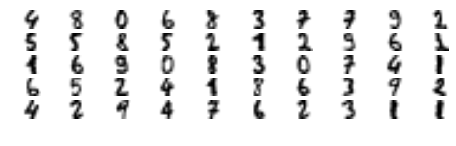

In [78]:
plt.figure(figsize = (8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(50 // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap = "binary",
               interpolation = "bilinear")
    plt.axis('off')

In [79]:
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
                                    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
                                    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
                                    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
                                    4, 2, 9, 4, 7, 6, 2, 3, 1, 1])

In [80]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs",
                             max_iter = 5000, random_state = 42)
log_reg.fit(X_representative_digits, y_representative_digits)

log_reg.score(X_test, y_test)

0.9222222222222223

In [81]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(50):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [82]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9333333333333333

In [83]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(50):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [84]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [85]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.94

In [86]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

## Gaussian Mixtures

In [87]:
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [88]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

print("Weights", gm.weights_,
      "\nMeans", gm.means_,
      "\nCovariances", gm.covariances_, sep = "\n")
print("\nAlgorithm Convergence: ", gm.converged_,
      "\nNumber of Iterations: ", gm.n_iter_)

Weights
[0.20965228 0.4000662  0.39028152]

Means
[[ 3.39909717  1.05933727]
 [-1.40763984  1.42710194]
 [ 0.05135313  0.07524095]]

Covariances
[[[ 1.14807234 -0.03270354]
  [-0.03270354  0.95496237]]

 [[ 0.63478101  0.72969804]
  [ 0.72969804  1.1609872 ]]

 [[ 0.68809572  0.79608475]
  [ 0.79608475  1.21234145]]]

Algorithm Convergence:  True 
Number of Iterations:  4


In [89]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [90]:
gm.predict_proba(X)

array([[2.32389467e-02, 6.77397850e-07, 9.76760376e-01],
       [1.64685609e-02, 6.75361303e-04, 9.82856078e-01],
       [2.01535333e-06, 9.99923053e-01, 7.49319577e-05],
       ...,
       [9.99999571e-01, 2.13946075e-26, 4.28788333e-07],
       [1.00000000e+00, 1.46454409e-41, 5.12459171e-16],
       [1.00000000e+00, 8.02006365e-41, 2.27626238e-15]])

In [91]:
X_new, y_new = gm.sample(6)
X_new, y_new

(array([[ 2.95400315,  2.63680992],
        [-1.16654575,  1.62792705],
        [-1.39477712, -1.48511338],
        [ 0.27221525,  0.690366  ],
        [ 0.54095936,  0.48591934],
        [ 0.38064009, -0.56240465]]), array([0, 1, 2, 2, 2, 2]))

In [92]:
gm.score_samples(X)

array([-2.60782346, -3.57106041, -3.33003479, ..., -3.51352783,
       -4.39802535, -3.80743859])

In [93]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

In [94]:
pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999217849

In [95]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution = 1000, show_ylabels = True):
    mins = X.min(axis = 0) - 0.1
    maxs = X.max(axis = 0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm = LogNorm(vmin = 1.0, vmax = 30.0),
                 levels = np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm = LogNorm(vmin = 1.0, vmax = 30.0),
                levels = np.logspace(0, 2, 12),
                linewidths = 1, colors = 'k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths = 2, colors = 'r', linestyles = 'dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize = 2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize = 14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize = 14, rotation = 0)
    else:
        plt.tick_params(labelleft = False)

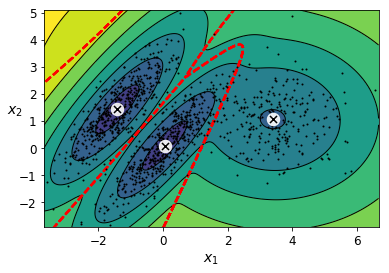

In [96]:
plot_gaussian_mixture(gm, X)

In [97]:
gm_full = GaussianMixture(n_components = 3, n_init = 10, covariance_type = "full", random_state = 42)
gm_tied = GaussianMixture(n_components = 3, n_init = 10, covariance_type = "tied", random_state = 42)
gm_spherical = GaussianMixture(n_components = 3, n_init = 10, covariance_type = "spherical", random_state = 42)
gm_diag = GaussianMixture(n_components = 3, n_init = 10, covariance_type = "diag", random_state = 42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=10, precisions_init=None,
        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

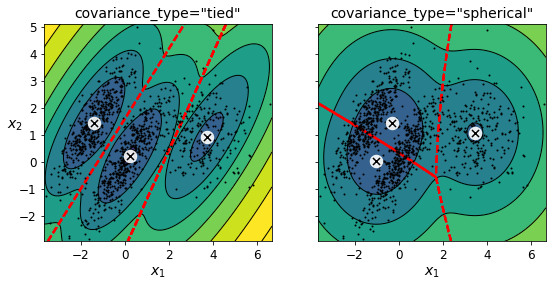

In [98]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize = (9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize = 14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels = False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize = 14)
    
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

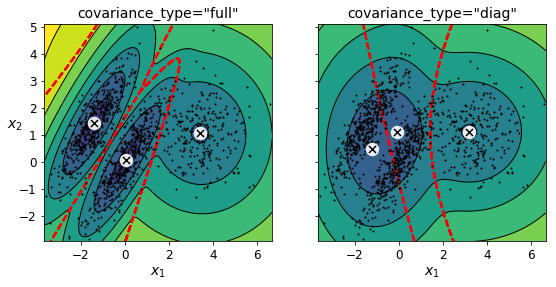

In [99]:
compare_gaussian_mixtures(gm_full, gm_diag, X)